# Proyecto Inmobiliaria

Este proyecto trata sobre los datos de captacion de propiedades de una inmobiliaria.

La mayoria de los inmuebles pertenecen a la ciudad de Valencia, en el estado Carabobo en Venezuela.

El escenario del proyecto es el siguente:

    "Eres un Cientifico de Datos, el cual fue contratado por la inmobiliaria para un proyecto. El foco principal de este proyecto consiste en la colocacion de precios en las viviendas
    de clientes nuevos que buscan vender sus propiedades de la mano de la Inmobiliaria. Te vas a basar en un conjunto de datos que te fue proporcionado en donde te indica informacion como
    la zona de la ciudad, el numero de habitaciones y de baños, el numero de puestos de estacionamiento entre otros datos. En este caso la propiedad a vender es un apartamento

    De la misma manera, a partir de estos datos, los ejecutivos de la Inmobiliaria desean tener un analisis descriptivo de la situacion e inventario de las propiedades con las que cuentan para la venta, en un dashboar informativo que cubra las siguientes preguntas:
        * El precio maximo, minimo y promedio de las viviendas manejadas
        * La distribucion, o cantidad, de viviendas captadas por cada zona.
        * La distribucion de propiedades captadas por cada ejecutivo.
    
    "
Ahora que tienes la informacion y las preguntas a resolver, podemos empezar.



In [2]:
#Lo primero que vamos a hacer es importar las librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Ahora procedemos a importar el dataset a utilizar

df = pd.read_excel("LISTADO RAPIDO Abril2021.xlsx", sheet_name='Apartamento')

#Y llamamos el dataset para verificar que se haya importado tal como esperamos
df

,Cod Inm,Zona,Precio,Conj. Residencial,Mtrs Const,Hab,Baños,P/E,C/E,P/electrica,CAPTADOR
0,ZI-A1001,San Diego,21000,Valle Topacio,57.0,2,2,1,No,No,Patricia Contreras
1,ZI-A1002,La Granja,22000,La Paz,90.0,3,2,1,Si,No,Patricia Contreras
2,ZI-A1018,Trigaleña,VENDIDO,Aria,69.0,2,2,2,Si,Si,Jhonny Belandria
3,ZI-A1028,La Granja,23500,La Granja,90.0,3,2,1,Si,No,Olga Contreras
4,ZI-A1029,Prebo PH,45000,Parque Prebo,180.0,4,3,3,Si,Si,Olga Contreras
...,...,...,...,...,...,...,...,...,...,...,...
135,ZI-A1376,San Diego,26000,Valle Topacio,57.0,2,2,1,Si,No,Patricia Contreras
136,ZI-A1377,San Diego,26500,Valle Topacio,57.0,2,2,1,Si,No,Patricia Contreras
137,ZI-A1378,San Diego,18000,Terrazas de San Diego,67.0,3,2,1,Si,No,Patricia Contreras
138,ZI-A1379,San Diego,27000,Terrazas de San Diego (PH),130.0,4,3,1,Si,No,Patricia Contreras


In [4]:
# En el dataset puedo observar que cada fila es un apartamento y cada columna es una caracteristica de este. Entre estas caracteristicas
# hay una que es CAPTADOR que indica el nombre de la persona que capturo la informacion de cada apartamento. En este proyecto no es importante
# el nombre como tal, pero si me interesa esta columna, para posteriormente realizar un dashboard en el que se pueda filtrar por captador.
# Por lo tanto, voy a reemplazar cada valor unico del nombre de los captadores por 'captador1, captador2' y asi.\

#Para esto primero tengo que tener en una variable cuantos captadores hay
captadores_unicos = df['CAPTADOR'].unique()

#Luego, voy a crear un diccionario que reemplace los nombres por captador1, captador2, etc.
mapeo = {valor:f'captador{i+1}' for i, valor in enumerate(captadores_unicos)}

#Ahora reemplazo los valores originales de la columna CAPTADOR por los nuevos valores.

df['CAPTADOR'] = df['CAPTADOR'].map(mapeo)


In [5]:
#Y se muestra el df para verificar que se haya hecho el cambio correctamente.
df

,Cod Inm,Zona,Precio,Conj. Residencial,Mtrs Const,Hab,Baños,P/E,C/E,P/electrica,CAPTADOR
0,ZI-A1001,San Diego,21000,Valle Topacio,57.0,2,2,1,No,No,captador1
1,ZI-A1002,La Granja,22000,La Paz,90.0,3,2,1,Si,No,captador1
2,ZI-A1018,Trigaleña,VENDIDO,Aria,69.0,2,2,2,Si,Si,captador2
3,ZI-A1028,La Granja,23500,La Granja,90.0,3,2,1,Si,No,captador3
4,ZI-A1029,Prebo PH,45000,Parque Prebo,180.0,4,3,3,Si,Si,captador3
...,...,...,...,...,...,...,...,...,...,...,...
135,ZI-A1376,San Diego,26000,Valle Topacio,57.0,2,2,1,Si,No,captador1
136,ZI-A1377,San Diego,26500,Valle Topacio,57.0,2,2,1,Si,No,captador1
137,ZI-A1378,San Diego,18000,Terrazas de San Diego,67.0,3,2,1,Si,No,captador1
138,ZI-A1379,San Diego,27000,Terrazas de San Diego (PH),130.0,4,3,1,Si,No,captador1


In [6]:
#Luego se ve que en la columna de 'Precio' hay valores de texto. Se van a llamar
#los valores unicos de esta columna para verificar que textos unicos hay realmente
df['Precio'].unique()

#Por lo visto solo hay tres, 'VENDIDO', 'SUSPENDIDO' e 'INACTIO'.
#Para efectos del proyecto estos valores no me sirven de nada. Por lo tanto los
#voy a eliminar

df = df[df['Precio'] != 'VENDIDO'] #Eliminar las filas con el valor 'VENDIDO'

df = df[df['Precio'] != 'SUSPENDIDO'] #Eliminar las filas con el valor 'SUSPENDIDO'

df = df[df['Precio'] != 'INACTIO'] #Eliminas las filas con el valor 'INACTIO'

#Ahora veamos nuevamente los valores unicos del dataset para validar si no hay
#ningun valor de texto

df['Precio'].unique()



array([21000, 22000, 23500, 45000, 32000, 18000, 15800, 98000, 155000,
       35000, 38000, 36750, 10500, 48000, 44000, 33000, 20000, 26000,
       53000, 80000, 16800, 78000, 147000, '8.000*', 40000, 28000, 30000,
       95000, 9500, 22500, 28500, 14800, 23000, 52000, 55000, 50000,
       16900, 160000, 16000, 25000, 31500, 11000, 24800, 150000, 99750,
       17000, 19000, 29500, 26900, 8300, 7300, 12900, 38500, 15500, 29000,
       18500, 61500, 49500, 85000, 36000, 26500, 27000], dtype=object)

In [7]:
#El unico valor que queda como string es una fila con el valor '8.000*'
#Voy a tomar este valor como si fuera verdaderamente 8000, por lo que voy
#a editar este valor para transformarlo de string a entero

df.loc[df['Precio'] == '8.000*','Precio'] = 8000

#Ahora veamos si los cambios se efectuaron correctamente

df['Precio'].unique()

array([21000, 22000, 23500, 45000, 32000, 18000, 15800, 98000, 155000,
       35000, 38000, 36750, 10500, 48000, 44000, 33000, 20000, 26000,
       53000, 80000, 16800, 78000, 147000, 8000, 40000, 28000, 30000,
       95000, 9500, 22500, 28500, 14800, 23000, 52000, 55000, 50000,
       16900, 160000, 16000, 25000, 31500, 11000, 24800, 150000, 99750,
       17000, 19000, 29500, 26900, 8300, 7300, 12900, 38500, 15500, 29000,
       18500, 61500, 49500, 85000, 36000, 26500, 27000], dtype=object)

In [8]:
#Ya no hay ningun valor de tipo texto en la colummna 'Precio'.
#Sin embargo, el tipo de datos de esta columna aun no es entero, por lo tanto
#voy a cambiar el tipo de dato de esta columna

df['Precio'] = df['Precio'].astype(int) #Para transformar esta columna de tipo entero

#Ahora veamos como quedo el tipo de dato de cada columna

df.info()

#Excelente!!
#Ahora todas las columnas tienen el tipo de dato que se requiere.

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 139
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cod Inm            95 non-null     object 
 1   Zona               95 non-null     object 
 2   Precio             95 non-null     int64  
 3   Conj. Residencial  93 non-null     object 
 4   Mtrs Const         93 non-null     float64
 5   Hab                95 non-null     int64  
 6   Baños              95 non-null     int64  
 7   P/E                95 non-null     int64  
 8   C/E                95 non-null     object 
 9   P/electrica        95 non-null     object 
 10  CAPTADOR           95 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 8.9+ KB


In [9]:
#Se puede ver que la columna donde indica los metros de y el conjunto residencial
#Tienen solamente dos valores nulos. Es decir, tiene 93 valores no nulos, en vez de
#los 95 valores no nulos del resto de las columnas. En esta celda veremos ambas
#cuestiones.

#df.drop(columns=['Conj. Residencial'], inplace=True) #Columna 'Conj.Residencial' eliminada

df.dropna(inplace=True)
#Tomando en cuenta de que solamente eran dos valores nulos, se eliminaron
#esos dos valores del dataset. No creo que sean tan relevantes para el modelo

In [10]:
#Verifiquemmos nuevamente la informacion del dataset
df.isnull().sum()

#No hay valores nulos

Cod Inm              0
Zona                 0
Precio               0
Conj. Residencial    0
Mtrs Const           0
Hab                  0
Baños                0
P/E                  0
C/E                  0
P/electrica          0
CAPTADOR             0
dtype: int64

In [11]:
#Exportar el dataset limpio a un nuevo archivo de excel

df.to_excel("apartamentos_valencia.xlsx", index=False)

## Ya se completo la seccion de la limpieza de los datos

Ahora se va a comenzar con el analisis exploratorio de los datos, lo que tambien
puede ser las preguntas que se propusieron al inicio del proyecto:

    * El precio maximo, minimo y promedio de las viviendas manejadas
    * Cantidad de inmuebles y precio por zona
    * La distribucion, o cantidad, de viviendas captadas por cada zona.
    * La distribucion de propiedades captadas por cada ejecutivo.

In [10]:
#Vamos a empezar por averiguar la cantidad de inmuebles y el promedio del precio
#por cada zona

cantidad_promedio = df.groupby('Zona')['Precio'].agg(
    Cantidad='count',
    Promedio=lambda x: round(x.mean(),2)
).sort_values(by='Cantidad')

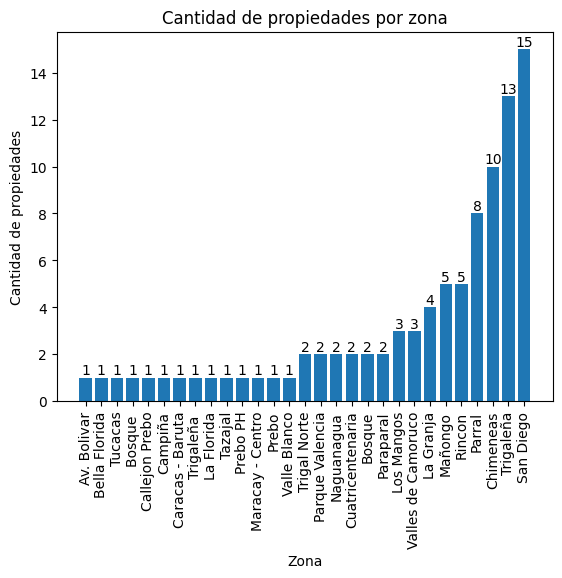

In [11]:
#y con la variable creada anteriormente quiero crear un grafico de barras
#o tambien histograma

plt.bar(cantidad_promedio.index, cantidad_promedio['Cantidad'])
plt.xlabel('Zona')
plt.ylabel('Cantidad de propiedades')
plt.title('Cantidad de propiedades por zona')
plt.xticks(rotation=90)

for i,v in enumerate(cantidad_promedio['Cantidad']):
  plt.annotate(str(v), xy=(i,v), ha='center', va='bottom')

plt.show()

En el grafico anterior se puede observar que las zonas con mayor cantidad de propiedades captadas estan en San Diego, La Trigaleña, Chimeneas y Parral. Conn 15, 13, 10 y 8 inmuebles captados respectivamente


In [12]:
#Luego se va a verificar el precio maximo, minimo y el prommedio
df.agg(
    Precio_maximo=('Precio','max'),
    Precio_minimo=('Precio','min'),
    Precio_promedio=('Precio','mean')
)

,Precio
Precio_maximo,160000.000000
Precio_minimo,7300.000000
Precio_promedio,39298.913043


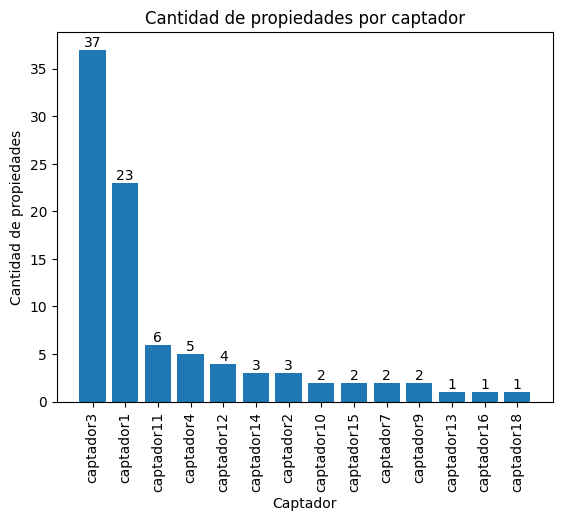

In [13]:
#Por ultimo quiero averiguar la cantidad de propiedades captadas por cada captador

nro_propXcaptador = df.groupby('CAPTADOR')['Precio'].count().sort_values(ascending=False)

#Y crear un grafico de barras

plt.bar(nro_propXcaptador.index, nro_propXcaptador.values)
plt.xlabel('Captador')
plt.ylabel('Cantidad de propiedades')
plt.title('Cantidad de propiedades por captador')
plt.xticks(rotation=90)

for i,v in enumerate(nro_propXcaptador.values):
  plt.annotate(str(v), xy=(i,v), ha='center', va='bottom')

plt.show()

In [14]:
#Porcentaje de captaciones por cada captador
porcentaje_captadores = (nro_propXcaptador / nro_propXcaptador.sum()) * 100

porcentaje_captadores

CAPTADOR
captador3     40.217391
captador1     25.000000
captador11     6.521739
captador4      5.434783
captador12     4.347826
captador14     3.260870
captador2      3.260870
captador10     2.173913
captador15     2.173913
captador7      2.173913
captador9      2.173913
captador13     1.086957
captador16     1.086957
captador18     1.086957
Name: Precio, dtype: float64

Y aca, se puede ver que la mayor cantidad de captaciones que hubo en la empresa fue por parte de los captadores 3 y 1. Con el 40.21% y 25% respectivamente

## Ahora que ya terminamos con las preguntas propuestas inicialmente, empecemos con el proposito principal de este proyecto que es la prediccion de los precios

Hay que recordar lo que indica el enunciado principal:

Eres un Cientifico de Datos, el cual fue contratado por la inmobiliaria para un proyecto. El foco principal de este proyecto consiste en la colocacion de precios en las viviendas
de clientes nuevos que buscan vender sus propiedades de la mano de la Inmobiliaria. Te vas a basar en un conjunto de datos que te fue proporcionado en donde te indica informacion como
la zona de la ciudad, el numero de habitaciones y de baños, el numero de puestos de estacionamiento entre otros datos. En este caso la propiedad a vender es un apartamento.

Es decir, se requiere realizar la prediccion de los precios de apartamentos para saber que precio ponerle a las viviendas de nuevos clientes que desean vender sus propiedades con la Inmobiliaria.


Primero voy a hacer analisis de relacion con las variables para validar que tipo de relacion existe entre las variables. Posteriormente, verificare los coeficientes de significancia estadistica para validar que variables me pueden servir para la prediccion. Si me sirve una sola variable para la prediccion de los precios, es preferible obtener mas caracteristicas y mas datos para realizar el trabajo. Posteriormente, procedere con la construccion del modelo, su entrenamiento y prueba. Y por ultimo, al tener el modelo ya entrenado y probado, se hara la suposicion de las caracteristicas de un cliente ficticio para el caso y asi poder cumplir con el objetivo.



In [15]:
df

,Cod Inm,Zona,Precio,Conj. Residencial,Mtrs Const,Hab,Baños,P/E,C/E,P/electrica,CAPTADOR
0,ZI-A1001,San Diego,21000,Valle Topacio,57.0,2,2,1,No,No,captador1
1,ZI-A1002,La Granja,22000,La Paz,90.0,3,2,1,Si,No,captador1
3,ZI-A1028,La Granja,23500,La Granja,90.0,3,2,1,Si,No,captador3
4,ZI-A1029,Prebo PH,45000,Parque Prebo,180.0,4,3,3,Si,Si,captador3
6,ZI-A1057,Mañongo,32000,Sun Suite,81.0,3,2,2,Si,No,captador3
...,...,...,...,...,...,...,...,...,...,...,...
135,ZI-A1376,San Diego,26000,Valle Topacio,57.0,2,2,1,Si,No,captador1
136,ZI-A1377,San Diego,26500,Valle Topacio,57.0,2,2,1,Si,No,captador1
137,ZI-A1378,San Diego,18000,Terrazas de San Diego,67.0,3,2,1,Si,No,captador1
138,ZI-A1379,San Diego,27000,Terrazas de San Diego (PH),130.0,4,3,1,Si,No,captador1


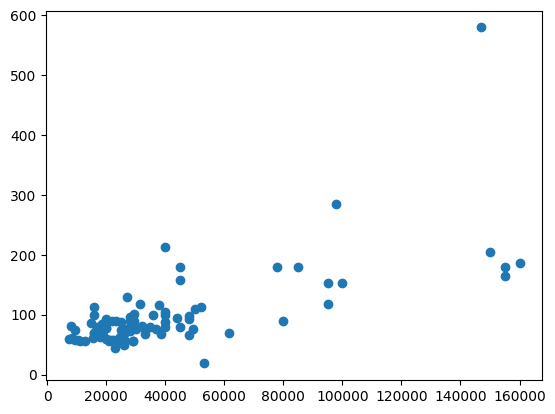

In [16]:
#Relacion entre el precio y los metros construidos
plt.scatter(df['Precio'],df['Mtrs Const'])

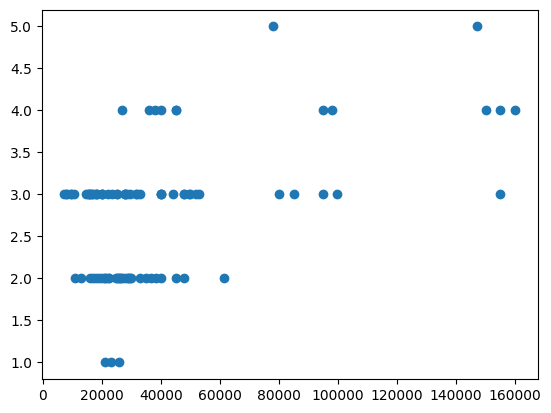

In [17]:
#Relacion entre el precio y el numero de habitaciones
plt.scatter(df['Precio'], df['Hab'])

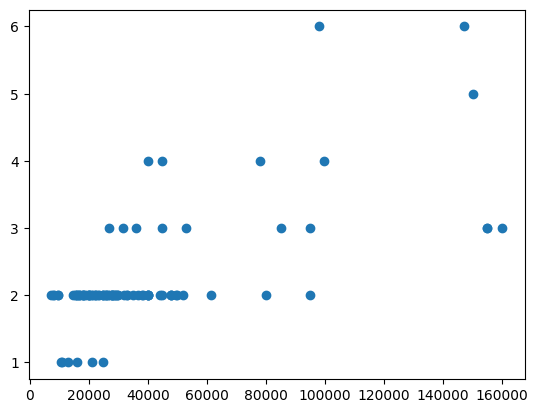

In [18]:
#Relacion entre el precio y el numero de banos
plt.scatter(df['Precio'], df['Baños'])

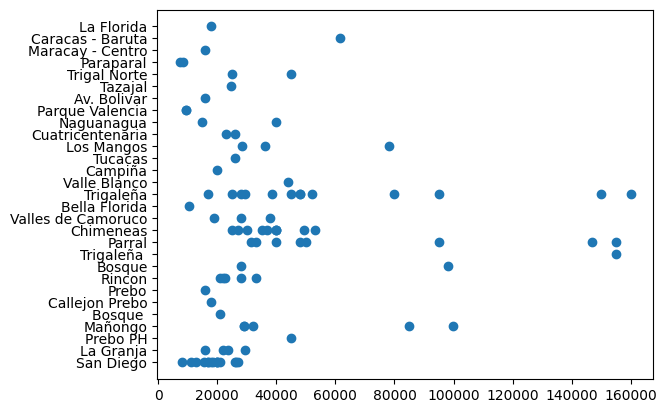

In [19]:
#Relacion entre el precio y el numero de habitaciones
plt.scatter(df['Precio'], df['Zona'])

Voy a hacer un pequeño cambio en el procedimiento. Primero voy a guardar los datos en variables distintas, en una variable los campos que sean independientes (o los predictores) y en otra la variable dependiente (o la que va a ser predicha). Luego intentare codificar el los campos de Zona y Conj. Residencial. Y despues de tener todo el preprocesamiento listo, voy a obtener los coeficientes necesarios para el modelo.

In [20]:
# Primero eliminamos la columna del id, ya que no es relevante para el resto del proyecto

df.drop(columns=['Cod Inm'], inplace = True)

#Luego se guardan las variables independientes en una variable X y la variable dependiente en una variable Y

x = df.drop(columns=['Precio']).values #Para indicar que guarde todas las columnas menos la de 'Precio'

y = df.iloc[:,1].values #Para indicar que guarde solamente la columna de 'Precio'

In [21]:
#verifico x

print(x)

[['San Diego' 'Valle Topacio' 57.0 2 2 1 'No' 'No' 'captador1']
 ['La Granja' 'La Paz' 90.0 3 2 1 'Si' 'No' 'captador1']
 ['La Granja' 'La Granja' 90.0 3 2 1 'Si' 'No' 'captador3']
 ['Prebo PH' 'Parque Prebo' 180.0 4 3 3 'Si' 'Si' 'captador3']
 ['Mañongo' 'Sun Suite' 81.0 3 2 2 'Si' 'No' 'captador3']
 ['Bosque ' 'Monticello' 59.0 1 1 1 'No' 'Si' 'captador2']
 ['Callejon Prebo' 'Sarait' 64.0 2 2 2 'Si' 'No' 'captador4']
 ['Prebo' 'Mayabeque' 114.0 3 2 1 'Si' 'No' 'captador3']
 ['Rincon' 'Doral Country' 58.0 2 2 1 'Si' 'No' 'captador2']
 ['Bosque' 'Bosque Encantado' 286.0 4 6 4 'Si' 'Si' 'captador3']
 ['Trigaleña ' 'Jacaranda' 165.0 4 3 3 'Si' 'Si' 'captador3']
 ['Parral' 'Morisca' 180.0 3 3 4 'Si' 'Si' 'captador3']
 ['Chimeneas' 'Las Chimeneas' 80.0 2 2 2 'Si' 'Si' 'captador3']
 ['Valles de Camoruco' 'Paraiso F' 117.0 4 2 1 'Si' 'No' 'captador1']
 ['Chimeneas' 'Las Chimeneas' 77.0 2 2 2 'Si' 'Si' 'captador11']
 ['Bella Florida' 'Las Tapias' 59.0 3 1 2 'Si' 'No' 'captador10']
 ['Trigaleñ

In [22]:
#verifico y

y

array([ 21000,  22000,  23500,  45000,  32000,  21000,  18000,  15800,
        21000,  98000, 155000, 155000,  35000,  38000,  36750,  10500,
        48000,  44000,  33000,  20000,  26000,  53000,  80000,  48000,
        16800,  78000,  26000, 147000,   8000,  40000,  20000,  28000,
        30000,  40000,  95000,   9500,  22500,  28500,  14800,  23000,
        52000,  28000,  50000,  16900, 160000,  16000,  25000,  31500,
        11000,   9500,  40000,  48000,  24800, 150000,  99750,  17000,
        33000,  19000,  95000,  25000,  29500,  45000,  26900,  22000,
        45000,  40000,  40000,   8300,   7300,  12900,  38500,  16000,
        29500,  15500,  20000,  29000,  28000,  25000,  28000,  18500,
        61500,  18000,  20000,  49500,  85000,  16000,  36000,  26000,
        26500,  18000,  27000,  29000])

In [23]:
#Ahora genero las variables dummies (o codifico las variables de Zona y Conj. Residencial)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Primero se crea un objeto de la clase ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False, handle_unknown = 'ignore'), [0,1]) #0 y 1 son los indices de las columnas que se van a transformar
    ], remainder='passthrough'
)

#Convierto las columnas a tipo strings para evitar errores
x[:, 0] = x[:, 0].astype(str)
x[:, 1] = x[:, 1].astype(str)

# Ya tengo los parametros para convertir estas columnas, ahora aplico estos parametros

x = np.array(ct.fit_transform(x))

#Este paso va a dar como resultado una matriz de datos muy grande, ya que son
#muchos los valores a codificar

In [24]:
#Ahora voy a hacer lo mismo, pero con las columnas de C\E (Cocina empotrada) y P\E (Planta electrica)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x[:,-2] = le.fit_transform(x[:,-2])
x[:,-3] = le.fit_transform(x[:,-3])

#En este caso utilizo indices negativos para indicar que son las ultimas dos columnas las que quiero transformar.
#Ya que la ultima transformacion que hice fue la de las variables dummies, y me creo muchos mas indices, por lo que no se con exactitud
#cuales son los indices de las ultimas dos columnas. Por lo tanto, utilizo indices negativos.

print(x)

[[0.0 0.0 0.0 ... 0 0 'captador1']
 [0.0 0.0 0.0 ... 1 0 'captador1']
 [0.0 0.0 0.0 ... 1 0 'captador3']
 ...
 [0.0 0.0 0.0 ... 1 0 'captador1']
 [0.0 0.0 0.0 ... 1 0 'captador1']
 [0.0 0.0 0.0 ... 1 0 'captador1']]


In [25]:
# Por ultimo, para terminar de preparar los datos, elimino la variable 'Captador' ya que no es relevante para el modelo

x = x[:, :-1]

print(x)

[[0.0 0.0 0.0 ... 1 0 0]
 [0.0 0.0 0.0 ... 1 1 0]
 [0.0 0.0 0.0 ... 1 1 0]
 ...
 [0.0 0.0 0.0 ... 1 1 0]
 [0.0 0.0 0.0 ... 1 1 0]
 [0.0 0.0 0.0 ... 2 1 0]]


### Ahora se va a crear el modelo, verificar los coeficientes y predecir los resultados

A partir de este punto, se va a entrar directamente a la implementacion de un modelo de regresion para predecir el precio de las casas en ciertas zonas de Valencia, Venezuela. De igual manera, se va a verificar los coeficientes de significancia estadistica para este modelo.

In [36]:
# Primero dividimos el dataset en sets de entrenamiento y prueba. Y luego se genera el modelo

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

#Ahora se genera el modelo de regresion lineal

from sklearn.linear_model import LinearRegression

#se crea una instancia, u objeto, de la clase LinearRegression para establecer el modelo

modelo = LinearRegression()

#Luego, le pasamos a este objeto los datos de entrenamiento para que el modelo se ajuste a estos datos con la funcion fit()

modelo.fit(x_train, y_train)

#Ahora que el modelo esta ajustado a los datos de entrenamiento, se va a consultar los coeficientes de este modelo.

coeficientes = modelo.coef_
interceptor =  modelo.intercept_


#Y tambien el valor de R^2

r2 = modelo.score(x_train, y_train) #Esta medida indica que tan bien se ajusta el modelo a los datos de prueba.
# Mientras mas cerca de 1, mejor es el ajuste del

#Ahora se obtendra el valor p. Este valor, en escencia, indica la probabilidad de que los resultados del modelo
#no esten dados por razon del azar. Mientras menor sea el valor p (< 0.05) mayor significancia estadistica habra

from sklearn.feature_selection import f_regression

f_values, p_values = f_regression(x_train, y_train)

print(f'Coeficiente de determinacion R^2: {r2}')
print(f'Coeficientes: {coeficientes}')
print(f'Intercepto: {interceptor}')
print(f'Valor p: {p_values}')

Coeficiente de determinacion R^2: 0.9919696791747508
Coeficientes: [-3.88625618e+03 -4.23266071e+03  1.24700579e+04  4.96107450e+03
  3.23998957e+03 -1.98307221e+03  2.86308932e-09 -4.71620265e+02
 -2.38885782e+03  1.99361239e-09  6.47660467e+02 -4.27808099e+03
  3.87964747e+03  6.52285410e+03 -4.07729119e+03 -2.10283084e+04
 -9.27556190e+03  2.57826766e+04 -4.65503497e+03 -7.87141084e+03
  5.00333347e+03 -1.47093231e+03 -2.91286023e+03 -9.01510357e+03
  1.08872283e+04 -3.18323146e-11  3.42943590e+03  2.61848532e+03
 -1.89539206e+03  1.09139364e-11 -7.27716066e+03 -1.38777372e+04
  1.40460055e+03  1.00044417e-11 -2.47862761e+03  4.64300282e+03
 -4.64339987e+03 -2.91286023e+03  1.62639895e+04  2.38187248e-12
  1.01686010e+04  9.22939910e+03  3.87964747e+03 -2.65604677e+02
 -9.01510357e+03  5.00333347e+03 -4.63216203e+03  2.36851783e+04
  1.09139364e-11  4.82341944e-12 -2.38885782e+03 -9.09494702e-13
  5.49790624e+03 -3.63797881e-12 -3.99534236e+03 -3.88625618e+03
  2.45757215e+03 -4.232

In [37]:
#Celda de prueba para obtener el valor p y coeficientes de determinacion y de las variables independientes

import statsmodels.api as sm

# Nos aseguramos de que x_train sea un array de tipo float
# Esto es necesario para que statsmodels pueda manejar los datos correctamente
x_train_numeric = x_train.astype(float)

x_train_const = sm.add_constant(x_train_numeric)

modelo_sm = sm.OLS(y_train, x_train_const).fit()

print(f'Coeficiente de determinacion R^2: {modelo_sm.rsquared}')
print(f'Coeficientes: {modelo_sm.params}')
print(f'Valor p: {modelo_sm.pvalues}')

Coeficiente de determinacion R^2: 0.9919696791747508
Coeficientes: [-2.26420784e+04 -4.98904363e+03 -5.33544816e+03  1.24075705e+04
  4.64632299e+03  2.13720212e+03 -3.08585966e+03 -5.62528425e-11
 -1.01119428e+03 -2.70360933e+03  8.07083072e-11 -8.22722798e+02
 -5.14422622e+03  2.77686002e+03  5.42006665e+03 -5.18007864e+03
 -2.26668677e+04 -1.07459452e+04  2.50179495e+04 -5.75782242e+03
 -8.18616235e+03  3.90054602e+03 -3.36142508e+03 -3.22761173e+03
 -9.32985508e+03  1.03364131e+04  1.44623994e-12  3.11468439e+03
  2.30373382e+03 -3.15555526e+03  7.61180949e-12 -7.59224279e+03
 -1.39564250e+04  1.31467155e+03 -6.55735151e-12 -2.56855661e+03
  3.90781119e+03 -5.37859151e+03 -3.22761173e+03  1.61853016e+04
  1.08323640e-12  9.60158545e+03  8.66238352e+03  2.77686002e+03
 -1.70645244e+03 -9.32985508e+03  3.90054602e+03 -5.36735366e+03
  2.36064904e+04  3.70281529e-12 -2.80973116e-12 -2.70360933e+03
 -4.71276344e-12  5.73454846e+03 -2.18334415e-12 -4.73053399e+03
 -4.98904363e+03  2.367

### El modelo no servira para predecir los datos

Para este proyecto, se buscaba predecir el precio de las casas en la ciudad de Valencia, Venezuela. Sin embargo, los datos no tienen una significancia o relacion plena que permitan realizar un modelo de machine learning que prediga el precio. Las razones son las siguiente:

En terminos sencillos, cuando se realizan modelos de machine learning, como en este caso de regresion, se tiene que evaluar y medir el rendimiento de este modelo. Una de las maneras es realizando la misma prediccion, y si los valores predichos son similares o parecidos a los valores originales, el modelo cumplio los objetivos. Otra forma es el calculo de ciertos indicadores que ayudan a determinar su rendimiento, entre esos el coeficiente de determinacion R^2 y el valor p. Incluso la creacion de graficos para verificar "al ojo por ciento", como se dice coloquialmente, tambien es una manera de verificar como pueden ser los resultados del modelo.

  -R^2: Para validar el rendimiento de un modelo de regresion con esta medida se verifica que este valor este lo mas cerca posible de 1. Mientras mayor sea el valor, o mas cercano este de 1, indica que el modelo explica de manera optima los datos. En este caso el valor del coeficiente de determinacion (R^2) es de 0.9919696791747508. Este caso el modelo puede explicar bien los datos. Sin embargo, el valor p tiene otra cara.
  
  -P value: El valor p, en palabras sencillas indica la probabilidad de que los resultados del modelo no esten dados al azar. Mientras mas pequeño sea el valor (menor a 0.05), mejor sera el rendimmiento. En este caso, realice el calculo para que se reflejara el valor p en todos los campos (o columnas) de datos (recordar que al realizar la codificacion de dos columnas, estas se dividieron en mas columnas tomando valores binarios de 0 y 1), y ninguna de las columnas se acerca al valor deseado que es 0.05.


Dadas estas razones, se puede concluir que un modelo de regresion lineal no es capaz de realizar la prediccion o estimacion correcta de los precios de las casas en la ciudad de Valencia.

Esto puede deberse tambien a la falta de datos para trabajar, ya que el dataset empleado no es mayor a 100 registros. De igual manera, las caracteristicas de los inmuebles han sido relativamente escazas. De tener mayor informacion sobre como otras caracteristicas pueden sumar o restar valor a un apartamento, el modelo podria funcionar de manera mas optima.



Sin embargo, no llegamos hasta este punto para nada. Con el modelo y los datos que se tienen en este proyecto voy a realizar la prediccion que planteo inicialmente. Aun así, seguire investigando y buscando otras formas y modelos que se puedan ajustar a los datos, y poder realizar un trabajo mas optimo.

In [38]:
#Con esta celda devuelvo los valores de las variables dummies.
#Es decir, devuelvo el valor original a las columnas de Conj.Residencial y Zona

num_columns_generated = ct.transformers_[0][1].categories_[0].size + ct.transformers_[0][1].categories_[1].size

x_test_decoded = ct.named_transformers_['encoder'].inverse_transform(x_test[:, :num_columns_generated])

print(x_test_decoded)

#x_test = x_test.astype(float)
#x_test

[['Trigaleña' 'Monreale']
 ['San Diego' 'Terrazas de San Diego']
 ['Trigaleña' 'Bahia Platinum']
 ['Parral' 'Imola']
 ['San Diego' 'Valle Topacio']
 ['La Florida' 'Portales de San Luis']
 ['Mañongo' '2014']
 ['Trigaleña' 'Amalfi Suite II']
 ['Mañongo' 'Puerta Real']
 ['Cuatricentenaria' 'Mirador Country']
 ['Trigaleña' 'Monteararat']
 ['Rincon' 'Doral Country']
 ['Caracas - Baruta' 'Terrazas de la Tahona']
 ['Parral' 'Gran Tepuy']
 ['Naguanagua' 'Los Caracaros']
 ['Trigaleña' 'Saint Moritz']
 ['Trigaleña ' 'Jacaranda']
 ['La Granja' 'La Granja']
 ['Mañongo' 'Sun Suite']]


In [ ]:
#Y en esta celda vuelvo a unir los valores correspondientes

x_test_ = x_test[:,-6:]

x_test_decoded = np.concatenate((x_test_decoded, x_test_), axis=1)

print(x_test_decoded)

[['Trigaleña' 'Monreale' 55.0 2.0 1.0 1.0 0.0 1.0]
 ['San Diego' 'Terrazas de San Diego' 62.23 3.0 2.0 1.0 1.0 0.0]
 ['Trigaleña' 'Bahia Platinum' 186.0 4.0 3.0 3.0 1.0 1.0]
 ['Parral' 'Imola' 68.0 2.0 2.0 1.0 1.0 1.0]
 ['San Diego' 'Valle Topacio' 60.0 2.0 2.0 1.0 1.0 0.0]
 ['La Florida' 'Portales de San Luis' 67.0 3.0 2.0 1.0 0.0 0.0]
 ['Mañongo' '2014' 180.0 3.0 3.0 0.0 1.0 1.0]
 ['Trigaleña' 'Amalfi Suite II' 205.0 4.0 5.0 0.0 1.0 1.0]
 ['Mañongo' 'Puerta Real' 154.0 3.0 4.0 5.0 0.0 0.0]
 ['Cuatricentenaria' 'Mirador Country' 45.0 1.0 2.0 1.0 1.0 1.0]
 ['Trigaleña' 'Monteararat' 113.0 3.0 2.0 2.0 1.0 1.0]
 ['Rincon' 'Doral Country' 74.0 3.0 2.0 1.0 1.0 0.0]
 ['Caracas - Baruta' 'Terrazas de la Tahona' 70.0 2.0 2.0 2.0 0.0 0.0]
 ['Parral' 'Gran Tepuy' 580.0 5.0 6.0 4.0 1.0 1.0]
 ['Naguanagua' 'Los Caracaros' 86.0 3.0 2.0 1.0 1.0 1.0]
 ['Trigaleña' 'Saint Moritz' 74.0 2.0 2.0 1.0 1.0 0.0]
 ['Trigaleña ' 'Jacaranda' 165.0 4.0 3.0 3.0 1.0 1.0]
 ['La Granja' 'La Granja' 90.0 3.0 2.0 1.0

In [54]:
#Ahora realizo la prediccion y la guardo en una variable

y_pred = modelo.predict(x_test)

print(y_pred)

#Importante la prediccion la hago con el set de prueba.
#Al momento de separar el dataset para entenar el modelo, lo separe en set de prueba y entrenamiento (x_trainy x_test)
#En este caso la prediccion la hice con x_test, el cual son datos que el modelo no ha recibido anteriormente en su entrenamiento

[ 33408.03464749  17854.99659807  71812.44417168  57035.53900874
  26047.73468867  19311.7025091   57217.7615674   81841.17470646
  34391.60123454  16600.27519868  54567.05301006  33900.77543785
   7332.80233077 121645.88583051  39287.30534178  23216.78524988
  60286.83614745  25028.15354661  24352.93580725]


In [53]:
y_test = y_test

print(y_test)

[ 25000.  15500. 160000.  33000.  20000.  18000.  85000. 150000.  99750.
  23000.  52000.  28000.  61500. 147000.  14800.  17000. 155000.  23500.
  29000.]


In [ ]:
#Aca se puede ver una comparacion de los valores reales y los valores predichos por el modelo

comparacion_ypred_ytest = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
comparacion_ypred_ytest['Diferencia'] = comparacion_ypred_ytest['y_test']-comparacion_ypred_ytest['y_pred']

comparacion_ypred_ytest['Diferencia'] = comparacion_ypred_ytest['Diferencia'].abs()

comparacion_ypred_ytest

#En resumen, el modelo efectivamente no logro realizar las predicciones correctamente.

,y_test,y_pred,Diferencia
0,25000.0,33408.034647,8408.034647
1,15500.0,17854.996598,2354.996598
2,160000.0,71812.444172,88187.555828
3,33000.0,57035.539009,24035.539009
4,20000.0,26047.734689,6047.734689
5,18000.0,19311.702509,1311.702509
6,85000.0,57217.761567,27782.238433
7,150000.0,81841.174706,68158.825294
8,99750.0,34391.601235,65358.398765
9,23000.0,16600.275199,6399.724801


## Finalizacion del proyecto

Las conclusiones del proyecto ya fueron indicadas en el ultimo markdown, por lo que no utilizaré este markdown para eso. Se pudo realizar la prediccion con los datos de prueba (x_test) y efectivamente no salen como se esperaban. Algunos datos se acercan a los valores originales, pero no todos. La mayoria de los datos predichos estan tienen rangos muy dispares con los datos originales. En resumen, el modelo no es efectivo para estos datos.

Nuevamente, voy a esperar para conseguir mas datos y mas campos para este proyecto de bienes raices en Valencia, Venezuela ya que creo que es interesante. Al mismo tiempo investigar y aprender sobre otros modelos de ml que pueda aplicar a estos datos para conseguir los resultados esperados.

Si llegaste hasta el final del proyecto, muchisimas gracias. Y si tienes algo que aportar sobre mi proyecto o consideras que podemos trabajar juntos, no dudes en contactarme:

Linkedin: www.linkedin.com/in/angel-diaz-372748252

GitHub: ENYEL00

Correo: angelgdiaze@gmailcom

In [ ]:
#Codigo para devolver los valores originales de las variables dummies
"""
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Datos de ejemplo
x_train = np.array([
    ['Caracas - Baruta', 'Conj. A'],
    ['Cuatricentenaria', 'Conj. B'],
    ['La Florida', 'Conj. C'],
    ['La Granja', 'Conj. D'],
    ['Mañongo', 'Conj. E']
])

# Crear el ColumnTransformer con OneHotEncoder
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False), [0, 1])
    ], remainder='passthrough'
)

# Ajustar y transformar los datos
x_train_transformed = ct.fit_transform(x_train)

# Calcular el número total de columnas generadas por el OneHotEncoder
num_columns_generated = ct.transformers_[0][1].categories_[0].size + ct.transformers_[0][1].categories_[1].size

x_train_decoded = ct.named_transformers_['encoder'].inverse_transform(x_train_transformed[:,:num_columns_generated])


print("Número total de columnas generadas por el OneHotEncoder:")
print(num_columns_generated)

x_train_decoded"
"""

'\nimport numpy as np\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\n\n# Datos de ejemplo\nx_train = np.array([\n    [\'Caracas - Baruta\', \'Conj. A\'],\n    [\'Cuatricentenaria\', \'Conj. B\'],\n    [\'La Florida\', \'Conj. C\'],\n    [\'La Granja\', \'Conj. D\'],\n    [\'Mañongo\', \'Conj. E\']\n])\n\n# Crear el ColumnTransformer con OneHotEncoder\nct = ColumnTransformer(\n    transformers=[\n        (\'encoder\', OneHotEncoder(sparse_output=False), [0, 1])\n    ], remainder=\'passthrough\'\n)\n\n# Ajustar y transformar los datos\nx_train_transformed = ct.fit_transform(x_train)\n\n# Calcular el número total de columnas generadas por el OneHotEncoder\nnum_columns_generated = ct.transformers_[0][1].categories_[0].size + ct.transformers_[0][1].categories_[1].size\n\nx_train_decoded = ct.named_transformers_[\'encoder\'].inverse_transform(x_train_transformed[:,:num_columns_generated])\n\n\nprint("Número total de columnas generadas por el 